# Project: Investigate No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project aims to analyze the no show appointments data set containg data from 100k medical appointments in Brazil with a column telling us wether the appointments were attended or not.
>
> The goal of this analysis is to find the characteristics of features among no show appointments and to determine what factors are most important when we are trying to predict whether a patient will show up for their scheduled appointment or not.
>
> These are some of the questestions:
>- Is age an important feature to consider?
>- Is gender an important feature to consider?
>- Is days between appointment and shedule an important factor to consider?
>- Is location an important feature to consider?
>- Did patients that recived an sms show up more?
>- Is alcholism an important feature to consider?
>- Is whether on not a patient is handicap important feature to consider?
>- Is whether on not a patient is diabetic important feature to consider?
>- Is whether on not a patient on scholarship important feature to consider?

In [1]:
# importing the libraries that will be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

<a id='wrangling'></a>
## Data Wrangling

>  In this section I will load in the data, check for cleanliness, and then trim and clean your dataset for this analysis. The cleaning steps are documented as comments in the cells and markdowns outside the cells

### General Properties

In [2]:
# data set url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'

('noshowappointments-kaggle-may-2016.csv',
 <http.client.HTTPMessage at 0x17d91db8850>)

In [64]:
# Load the no-show appointments dataset
df = pd.read_csv(url)

#view the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# check for more information on the dataset
display(df.info())
#check for null values
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


None

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> We can see that the dataset contains 110527 entries and 14 colums in total. We can also see that there are no null values present in any of the columns.
> I will be dropping the PatientId and AppointmentID column because they are unique identifiers and are not necessary for this analysis 

### Data Cleaning 

In [5]:
# checking the varible we are trying to predict (no-show)
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [6]:
# replacing no and yes with 1 and 0
df['No-show'].replace({'No':1,'Yes':0},inplace=True)

In [7]:
# now 0 represents no shows while 1 represents people that showed up
df['No-show'].value_counts()

1    88208
0    22319
Name: No-show, dtype: int64

In [8]:
# changing all column headers to lower case
col_list = list(df.columns)
new_label = []
for col in col_list:
    new_label.append(col.lower())
df.columns = new_label

In [9]:
# view the dataset
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [10]:
# dropping unnecessary columns
drop = ['patientid','appointmentid']
df.drop(drop,axis=1,inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [11]:
# inpecting the values in the age column
display(df['age'].nunique())
display(df['age'].value_counts())

104

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

We can see that there is a nagative value in the age column which is wrong. I have decided to inpect then drop the row with thus column.
We can also see that there are 103 different age value, to make analysis with age easier I am going to create an age range column.

In [12]:
# inpect the row with the wrong age value
df[df['age']==-1]
# dropping the row
df.drop(df[df['age']==-1].index,inplace=True)
# checking the value count for age again
df.age.value_counts()

NumExpr defaulting to 8 threads.


0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [13]:
# creating age range column
bins = [0, 20, 40, 60, 80,120]
labels = ['0-20','21-40','41-60','61-80','above 80']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.sample(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_range
102717,F,2016-06-02T15:08:44Z,2016-06-06T00:00:00Z,68,SÃO BENEDITO,0,1,1,0,0,1,1,61-80
44062,M,2016-05-24T08:20:07Z,2016-05-24T00:00:00Z,8,CONSOLAÇÃO,0,0,0,0,0,0,1,0-20
74063,F,2016-05-13T07:27:25Z,2016-05-31T00:00:00Z,49,SANTA LUÍZA,0,0,0,0,0,1,1,41-60
54562,F,2016-05-12T09:11:57Z,2016-05-18T00:00:00Z,51,SÃO BENEDITO,0,1,1,0,0,0,0,41-60
60249,M,2016-05-06T07:02:41Z,2016-05-06T00:00:00Z,31,CENTRO,0,0,0,0,0,0,1,21-40


In [14]:
# Inspecting data in the neighbourhood column
display(df['neighbourhood'].nunique())
display(df['neighbourhood'].unique())

81

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

We can see the column contains 81 unique values which are all in the same case and appear to be clean.

In [15]:
# checking the datatypes of columns in the dataframe
df.dtypes

gender              object
scheduledday        object
appointmentday      object
age                  int64
neighbourhood       object
scholarship          int64
hipertension         int64
diabetes             int64
alcoholism           int64
handcap              int64
sms_received         int64
no-show              int64
age_range         category
dtype: object

In [16]:
# change date columns to datetime type
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no-show                         int64
age_range                    category
dtype: object

In [17]:
# creating a column to show diffence in days between schedule and appointment date
df['days_between'] = df['appointmentday'].dt.date - df['scheduledday'].dt.date
df.sample(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_range,days_between
31150,F,2016-04-19 08:35:58+00:00,2016-05-06 00:00:00+00:00,61,BENTO FERREIRA,0,0,0,0,0,0,0,61-80,17 days
66619,F,2016-05-16 09:56:50+00:00,2016-05-16 00:00:00+00:00,23,JARDIM CAMBURI,0,0,0,0,0,0,1,21-40,0 days
15902,F,2016-05-10 09:57:10+00:00,2016-05-12 00:00:00+00:00,29,PIEDADE,0,0,0,0,0,0,1,21-40,2 days
84780,F,2016-04-25 08:03:48+00:00,2016-06-03 00:00:00+00:00,53,BONFIM,0,0,0,0,0,1,0,41-60,39 days
39863,M,2016-05-19 10:16:00+00:00,2016-05-20 00:00:00+00:00,10,SANTO ANTÔNIO,0,0,0,0,0,0,1,0-20,1 days


In [18]:
# changing the column to type string
df['days_between'] = df['days_between'].astype('string')

In [19]:
# extract integer values from the days_between column
df['days_between'] = df['days_between'].apply(lambda x: x.split()[0])
df['days_between'] = df['days_between'].astype('int')
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_range,days_between
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,61-80,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,41-60,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,61-80,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0-20,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,41-60,0


In [20]:
# checking for inconsistent values
df[df['days_between'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_range,days_between
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,21-40,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,0-20,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,21-40,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,above 80,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,0-20,-1


The 'days_between' column can not be negative because the schdule date can not be later than the appointment date. I will be removing these rows because they are small in number

In [21]:
#removing rows with wrong days_between values
df = df[~df['days_between'] < 0]

In [22]:
# checking if the rows were removed
df[df['days_between'] < 0] 

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_range,days_between


<a id='eda'></a>
## Exploratory Data Analysis

> We will be carrying out exploratory analysis on different features to check how the affect the "no-show" column (the independent variable)

### Research Question 1 (Is age an important feature to consider?)

In [23]:
# setting style for plots
sns.set_style("whitegrid")

In [24]:
# checking the value count of the age range from the sample
df['age_range'].value_counts()

0-20        31846
41-60       30081
21-40       28833
61-80       16910
above 80     2851
Name: age_range, dtype: int64

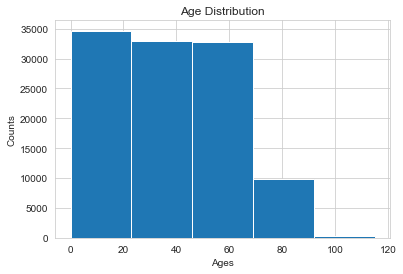

In [25]:
# check how age is distributed in our sample
plt.hist(df['age'],bins=5)
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

In [26]:
# create a dataframe of people that showed up for their appointment
df_show = df[df['no-show'] == 1] #showed for the appointment
df_noshow = df[df['no-show'] == 0]#did not show for the appointment

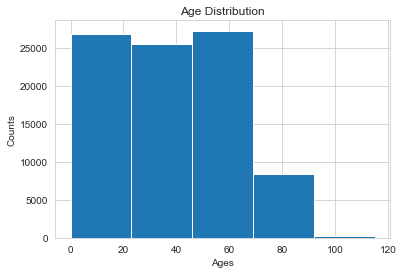

In [27]:
# plotting the age distribution across these two dataframes
plt.hist(df_show.age,bins=5)
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

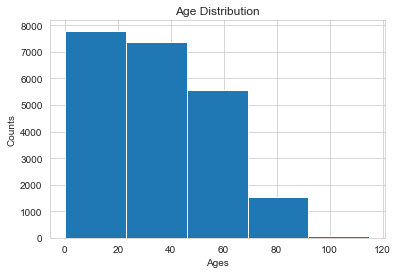

In [28]:
plt.hist(df_noshow.age,bins=5)
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

In [29]:
df_show[['age']].describe()

,age
count,88207.000000
mean,37.790504
std,23.338645
min,0.000000
25%,18.000000
50%,38.000000
75%,56.000000
max,115.000000


In [30]:
df_noshow[['age']].describe()

,age
count,22314.000000
mean,34.317872
std,21.965009
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


From the histogram and the description of the age columns among the sample data, we can observe the following:
* There is a slight difference in age distribution among no shows and patients that showed up
* Both dataframes have similar mean ages
* Patients 60 and above are less likely to be no-shows 

### Research Question 2  (Is gender an important feature to consider?)

In [31]:
# check the value count of sex
df.gender.value_counts()

F    71836
M    38685
Name: gender, dtype: int64

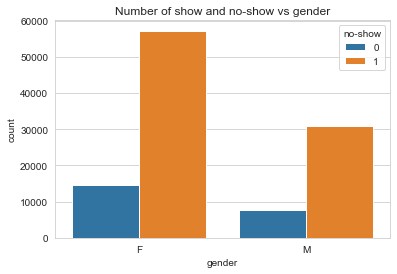

In [32]:
sns.countplot(x='gender',data=df,hue='no-show').set(title='Number of show and no-show vs gender');

In [33]:
#getting total male and female count
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']
male_count = df_male['appointmentday'].count()
female_count = df_female['appointmentday'].count()
display(male_count)
female_count

38685

71836

In [34]:
# getting male and female no show count
noshow_male = df_male[df_male['no-show'] == 0]
noshow_male_count = noshow_male['appointmentday'].count()
noshow_female = df_female[df_female['no-show'] == 0]
noshow_female_count = noshow_female['appointmentday'].count()
display(noshow_male_count)
noshow_female_count

7723

14591

In [35]:
# getting percentage noshow
per_male = noshow_male_count/male_count * 100
per_female = noshow_female_count/female_count * 100
print(f'{round(per_male,2)}% of the males that made appointments were no-shows')
print(f'{round(per_female,2)}% of the females that made appointments were no-shows')

19.96% of the males that made appointments were no-shows
20.31% of the females that made appointments were no-shows


From this analysis we can see that although the most of the appointments were made by females, the the rate of no-shows among the genders are very similar

### Research Question 3  (Is days between appointment and shedule an important factor to consider?)

In [36]:
#checking the desciption of the days between column
df['days_between'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_between, dtype: float64

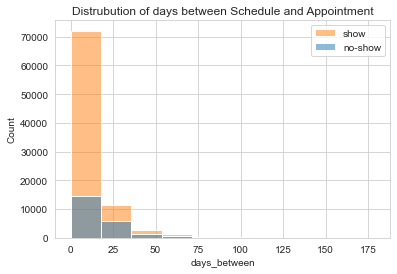

In [37]:
#plotting the distribution of days between schedule of appointments for show and no-show patients
sns.histplot(x='days_between',data=df,bins=10,hue='no-show').set(title = 'Distrubution of days between Schedule and Appointment')
plt.legend(title=None, loc='upper right', labels=['show', 'no-show'])
plt.show()

In [38]:
# checking the description for days between for no-shows
df_noshow['days_between'].describe()

count    22314.000000
mean        15.835484
std         16.605600
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: days_between, dtype: float64

In [39]:
# checking the description for days between for shows
df_show['days_between'].describe()

count    88207.000000
mean         8.754759
std         14.550450
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: days_between, dtype: float64

From this analysis we can observe the following:
* No-shows have an average of 15 days between schedule and appointment date
* Patients that show up have an average of 8 days between schedule and appointment date
* The higher the days between the higher the chance of the patient being a no-show

### Research Question 4  (Is location an important feature to consider?)

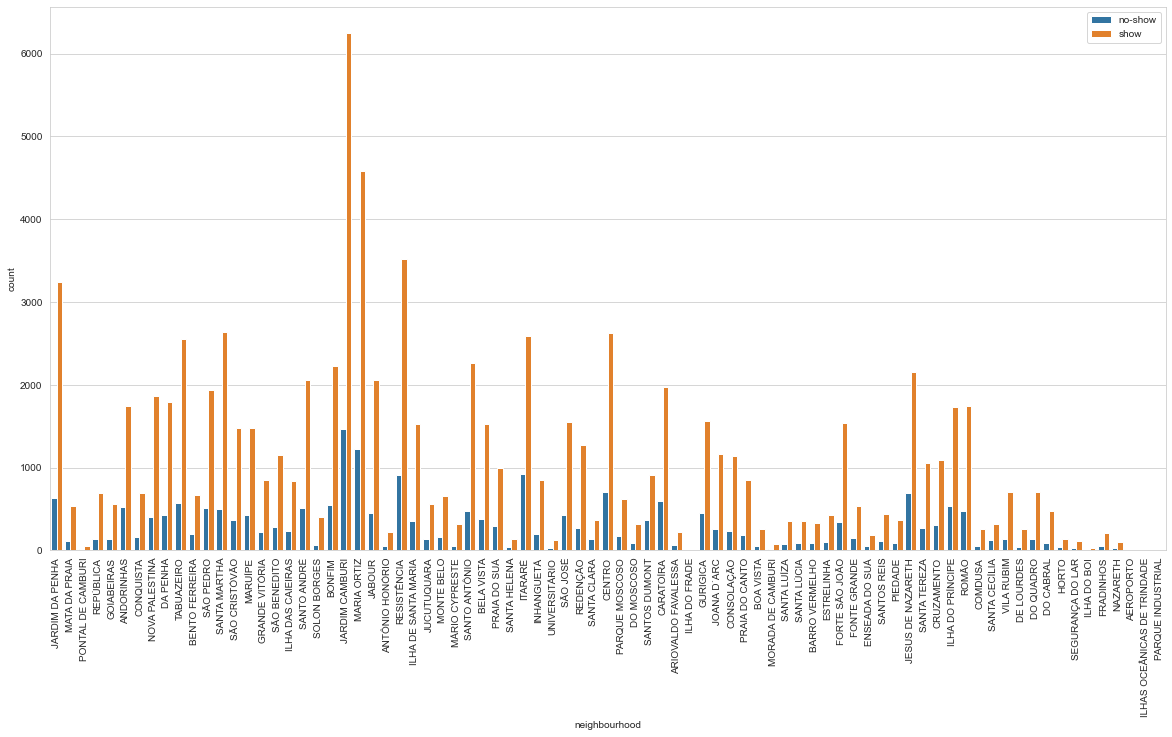

In [40]:
# check the value count of neighborhood in the no show data set
plt.figure(figsize=(20,10))
ax = sns.countplot(x='neighbourhood',data=df,hue='no-show')
ax.tick_params(axis='x', rotation=90)
plt.legend(title=None, loc='upper right', labels=['no-show','show'])

We can see that people from Jardim showed up the most and had the most no shows.

### Research Question 5  (Did patients that recived an sms show up more?)

In [41]:
df_noshow['sms_received'].value_counts()

0    12530
1     9784
Name: sms_received, dtype: int64

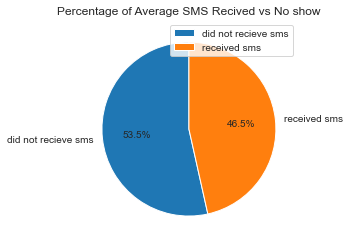

In [42]:
# plotting a pie chart to show how recieving sms affects no shows
df.groupby('sms_received').agg({'no-show':'mean'}).plot(kind='pie',startangle=90,subplots=True,labels=['did not recieve sms','received sms'],autopct='%1.1f%%')
plt.title('Percentage of Average SMS Recived vs No show')
plt.ylabel(None)
plt.show()

### Research Question 6  (Is alcholism an important feature to consider?)

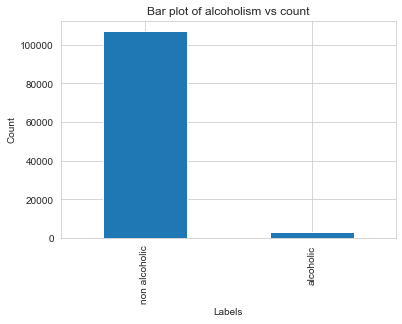

In [43]:
df['alcoholism'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['non alcoholic','alcoholic'])
plt.ylabel('Count')
plt.xlabel('Labels')
plt.title('Bar plot of alcoholism vs count');

In [44]:
df_show['alcoholism'].value_counts()

0    85524
1     2683
Name: alcoholism, dtype: int64

In [45]:
df_noshow['alcoholism'].value_counts()

0    21637
1      677
Name: alcoholism, dtype: int64

In [46]:
# getting number of alcoholics and non alcoholics
alc = df['alcoholism'] == 1
df_alc = df[alc]
df_nonalc = df[~alc]
alc_count = df_alc['scheduledday'].count()
nonalc_count = df_nonalc['scheduledday'].count()
display(alc_count)
nonalc_count

3360

107161

In [47]:
# getting the no show numbers for alcoholics and non alcoholics
noshow_alc = df_alc[df_alc['no-show'] == 0]['scheduledday'].count() # no show alcoholics
noshow_nonalc = df_nonalc[df_nonalc['no-show'] == 0]['scheduledday'].count() #no show non 
display(noshow_alc)
display(noshow_nonalc)

677

21637

In [48]:
# getting percentage noshow for alcoholics and non-alcholics
per_alc = noshow_alc/alc_count * 100
per_nonalc = noshow_nonalc/nonalc_count * 100
print(f'{round(per_alc,2)}% of alcholics were no-shows')
print(f'{round(per_nonalc,2)}% of non alcoholics were no-shows%')

20.15% of alcholics were no-shows
20.19% of non alcoholics were no-shows%


From this analysis we can see that alcholism does not affect wether a person is a no-show for an appointment, as both alcholics and non alcholics have very close no show rates.

### Research Question 7  (Is whether on not a patient is handicap important feature to consider?)

0    88720
1    21801
Name: hipertension, dtype: int64

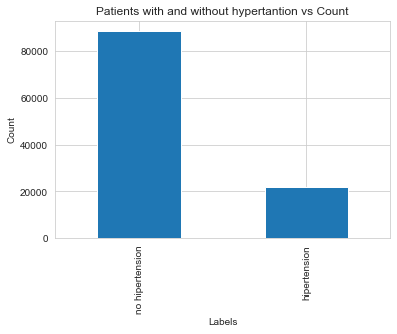

In [49]:
# checking the number of handicap patients
display(df.hipertension.value_counts())
# comparing handicap to non handicap patients with a bar chart
df.hipertension.value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['no hipertension','hipertension'])
plt.ylabel('Count')
plt.xlabel('Labels')
plt.title('Patients with and without hypertantion vs Count');

In [50]:
# creating dataframes for patients with and without hipertantion
hipe = df['hipertension'] == 1
df_hipe = df[hipe] #patients with hipertention
df_nohipe = df[~hipe] #patients without hipertention

In [51]:
# defining a function to show comparisms with a pie chart
def piefunc(df,col,labels,title):
    df_count = df[col].value_counts()
    df_count.plot(kind='pie',startangle=90,labels=labels,subplots=True,autopct='%1.1f%%')
    plt.ylabel(None)
    plt.title(title)
    return plt.show()

1    18029
0     3772
Name: no-show, dtype: int64

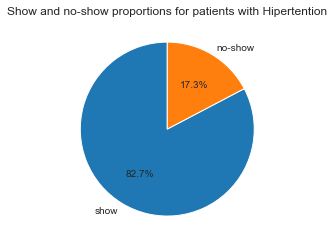

In [52]:
#plotting a pie chart to compare no-shows with patients that showed up among patients with hypertention
display(df_hipe['no-show'].value_counts())
piefunc(df_hipe,'no-show',labels=['show','no-show'],title='Show and no-show proportions for patients with Hipertention')

1    70178
0    18542
Name: no-show, dtype: int64

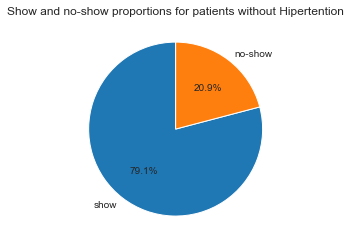

In [53]:
#plotting a pie chart to compare no-shows with patients that showed up among patients without hypertention
display(df_nohipe['no-show'].value_counts())
piefunc(df_nohipe,'no-show',labels=['show','no-show'],title='Show and no-show proportions for patients without Hipertention')

From the pie charts above we can see the no-show percentages for patients that have hypertention that those without are very close. Patients with hipertention had a slightly lower no show rate.

### Research Question 8  (Is whether on not a patient is diabetic important feature to consider?)

0    102578
1      7943
Name: diabetes, dtype: int64

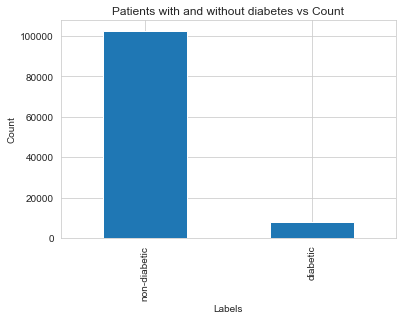

In [54]:
# using a bar chart to check the proportion of diabetic to non-diabetic patients
display(df['diabetes'].value_counts())
df['diabetes'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['non-diabetic','diabetic'])
plt.ylabel('Count')
plt.xlabel('Labels')
plt.title('Patients with and without diabetes vs Count');

In [55]:
# creating dataframes for patients with and without diabeties
dia = df['diabetes'] == 1
df_dia = df[dia] #patients with diabeties
df_nondia = df[~dia] #patients without diabeties

1    6513
0    1430
Name: no-show, dtype: int64

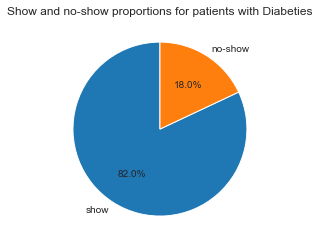

In [56]:
#plotting a pie chart to compare no-shows with patients that showed up among patients without hypertention
display(df_dia['no-show'].value_counts())
piefunc(df_dia,'no-show',labels=['show','no-show'],title='Show and no-show proportions for patients with Diabeties')

1    81694
0    20884
Name: no-show, dtype: int64

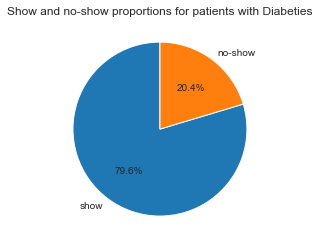

In [57]:
#plotting a pie chart to compare no-shows with patients that showed up among patients without hypertention
display(df_nondia['no-show'].value_counts())
piefunc(df_nondia,'no-show',labels=['show','no-show'],title='Show and no-show proportions for patients with Diabeties')

From the pie charts we can see that both diabetic and non diabetic patients have a no-show rate of close to 20% percents. Non diabetic patients have a slightly higher no-show rate.

### Research Question 8  (Is whether on not a patient on scholarship important feature to consider?)

0    99660
1    10861
Name: scholarship, dtype: int64

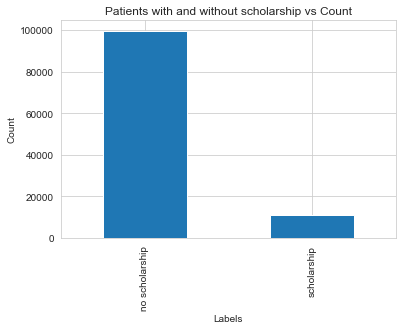

In [58]:
# checking the number of patients on scholarship
display(df.scholarship.value_counts())
# comparing handicap to non handicap patients with a bar chart
df.scholarship.value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['no scholarship','scholarship'])
plt.ylabel('Count')
plt.xlabel('Labels')
plt.title('Patients with and without scholarship vs Count')
plt.show();

In [59]:
# creating dataframes for patients with and without scholarships
sch = df['scholarship'] == 1
df_sch = df[sch] #patients with scholarship
df_nosch = df[~sch] #patients without scholarship

1    8283
0    2578
Name: no-show, dtype: int64

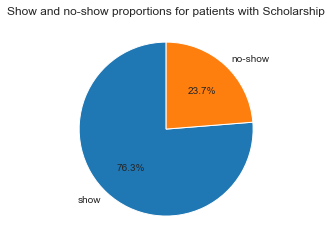

In [60]:
#plotting a pie chart to compare no-shows with patients that showed up among patients without hypertention
display(df_sch['no-show'].value_counts())
piefunc(df_sch,'no-show',labels=['show','no-show'],title='Show and no-show proportions for patients with Scholarship')

1    79924
0    19736
Name: no-show, dtype: int64

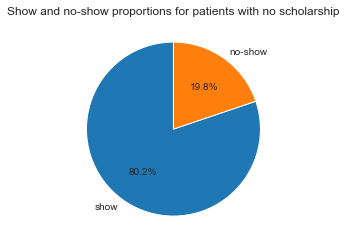

In [61]:
#plotting a pie chart to compare no-shows with patients that showed up among patients without hypertention
display(df_nosch['no-show'].value_counts())
piefunc(df_nosch,'no-show',labels=['show','no-show'],title='Show and no-show proportions for patients with no scholarship')

From the pie charts we can see that patients with no scholarship are slighly less likely to be no shows.
23.7% of patients with scholarships did not show up for appointments while 19.8% with out schorlarships were no-shows.

<a id='conclusions'></a>
## Conclusions

> From the exploratory analysis done on a number of patient features I have come to the following conclusions:
> * The factor that should be given the highest consideration when trying to predict whether a patient will show up for an appointmet or not is the differnce in days beetween the schedule and appontment date. It was observed that the higer the day differnce the more like the patient will be a no show.
> * Older patients (60 and above) are less likely to be no shows as we show from the age distribution charts for no show patients and the one for patients that showed up. The average age for patients that did no show up for appointments was slightly lower when compaired with patients that showed up.
> * Hypertention, diabeties and alcholism did not seem to significantly influence whether a patient will showed up for an appointment or not.
>> **Limitation:** The label (no-show) column is highly unbalanced; over 80% of the patients showed up. This can affect the results of out analysis.